In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import math
import random
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, roc_curve, auc, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import KFold

In [7]:
!pwd



/Users/kellymcgaw/Desktop/2020 Spring/mth2895


In [11]:
df_Dia = pd.read_csv('/Users/kellymcgaw/Desktop/2020 Spring/mth2895/data/coinbases.csv',sep='delimiter', header=None)

/Users/kellymcgaw/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [14]:
df_Dia.head(9)

,0
0,"""You can use this transaction report to inform..."
1,Transactions
2,"User,michael.mcgaw@pop.belmont.edu,5e6bfdc6c56..."
3,"Timestamp,Transaction Type,Asset,Quantity Tran..."
4,"2020-03-15T14:15:17Z,Buy,BTC,0.0276049,5325.50..."
5,"2020-03-15T14:15:39Z,Buy,BTC,0.02759842,5326.7..."
6,"2020-03-15T14:21:43Z,Buy,BTC,0.05610971,5268.2..."
7,"2020-03-15T21:46:12Z,Sell,BTC,0.02674134,5609...."
8,"2020-03-16T00:22:35Z,Buy,BTC,0.01830476,5299.7..."


In [18]:
a = df_Dia

AttributeError: 'DataFrame' object has no attribute 'column'

In [5]:

#df_Dia.drop(columns= ['weight', 'payer_code', 'medical_specialty', 'number_outpatient', 'number_emergency', 'number_inpatient'], inplace = True)
df_Dia['No_Insulin'] = (df_Dia['insulin'] == 'No').astype(int) #0 for None
df_Dia['Steady_Insulin'] = (df_Dia['insulin'] == 'Steady').astype(int) #  "Steady"
df_Dia['Down_Insulin'] = (df_Dia['insulin'] == 'Down').astype(int) # for Down
df_Dia['Up_Insulin'] = (df_Dia['insulin'] == 'Up').astype(int) # for Up
#df_Dia.drop(columns= ['insulin'], inplace = True)
# df_Dia['Glime'] = (df_Dia['glimepiride-pioglitazone'] == 'Yes').astype(int) #0 for None
# df_Dia['Metform_Rosi'] = (df_Dia['metformin-rosiglitazone'] == 'Yes').astype(int) #0 for None
# df_Dia['Metform_Piog'] = (df_Dia['metformin-pioglitazone'] == 'Yes').astype(int) #0 for None
# df_Dia['Change'] = (df_Dia['change'] == 'Ch').astype(int) #1 for Yes
# df_Dia['Glucose_Serum'] = (df_Dia['max_glu_serum'] == 'None').astype(int) #0 for None
# df = df_Dia[df_Dia.race != '?']
# df_Dia['A1Cresults'] = (df_Dia['A1Cresult'] == 'Yes').astype(int) #0 for None
# df_Dia['Metformin'] = (df_Dia['metformin'] == 'Yes').astype(int) #0 for None
# df_Dia['Repaglinide'] = (df_Dia['repaglinide'] == 'Yes').astype(int) #0 for None
# df_Dia['Nateglinide'] = (df_Dia['nateglinide'] == 'Yes').astype(int) #0 for None
# df_Dia['Chlorpropamide'] = (df_Dia['chlorpropamide'] == 'Yes').astype(int) #0 for None
# df_Dia['Glimepiride'] = (df_Dia['glimepiride'] == 'Yes').astype(int) #0 for None
# df_Dia['Acetohexamide'] = (df_Dia['acetohexamide'] == 'Yes').astype(int) #0 for None
# df_Dia['Glipizide'] = (df_Dia['glipizide'] == 'Yes').astype(int) #0 for None
# df_Dia['Glyburide'] = (df_Dia['glyburide'] == 'Yes').astype(int) #0 for None
# df_Dia['Tolbutamide'] = (df_Dia['tolbutamide'] == 'Yes').astype(int) #0 for None
# df_Dia['Pioglitazone'] = (df_Dia['pioglitazone'] == 'Yes').astype(int) #0 for None
# df_Dia['Acarbose'] = (df_Dia['acarbose'] == 'Yes').astype(int) #0 for None
# df_Dia['Miglitol'] = (df_Dia['miglitol'] == 'Yes').astype(int) #0 for None
# df_Dia['Troglitazone'] = (df_Dia['troglitazone'] == 'Yes').astype(int) #0 for None
# df_Dia['Tolazamide'] = (df_Dia['tolazamide'] == 'Yes').astype(int) #0 for None
# df_Dia['Examide'] = (df_Dia['examide'] == 'Yes').astype(int) #0 for None
# df_Dia['Citoglipton'] = (df_Dia['citoglipton'] == 'Yes').astype(int) #0 for None
########## THESE COLUMNS DON'T DO ANYTHING BRO ###########
df_Dia.drop(columns = ['diag_1', 'diag_2', 'diag_3'] ,inplace = True)
df_Dia.head()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,No_Insulin,Steady_Insulin,Down_Insulin,Up_Insulin
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,NO,1,0,0,0
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,No,No,Ch,Yes,>30,0,0,0,1
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,Yes,NO,1,0,0,0
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,No,No,Ch,Yes,NO,0,0,0,1
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,No,No,Ch,Yes,NO,0,1,0,0


In [6]:
df_Dia.drop(columns = ['metformin-rosiglitazone','metformin-pioglitazone','glipizide-metformin','glyburide-metformin', 'glimepiride-pioglitazone','change', 'max_glu_serum', 'A1Cresult', 'metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone','acarbose','acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton'], inplace = True)
#droppin

In [7]:

df_Dia.drop(columns= ['weight', 'payer_code', 'medical_specialty', 'number_outpatient','num_lab_procedures', 'number_emergency', 'number_inpatient','time_in_hospital'], inplace = True)

In [8]:
 
df_Dia['Binary_Gender'] = (df_Dia['gender']  == 'Male').astype(int) 
#haha

df_Dia['DiabeticMedication'] = (df_Dia['diabetesMed'] == "Yes").astype(int)


In [9]:

df_Dia.drop(columns = ['admission_type_id', 'discharge_disposition_id','admission_source_id','insulin','diabetesMed','rosiglitazone','gender'], inplace = True)
df_Dia.dtypes

df_Dia['Caucasian'] = (df_Dia['race'] == "Caucasian").astype(int)
df_Dia['AfricanAmerican'] = (df_Dia['race'] == "AfricanAmerican").astype(int)
df_Dia['Hispanic'] = (df_Dia['race'] == "Hispanic").astype(int)
df_Dia['Asian'] = (df_Dia['race'] == "Asian").astype(int)
#surely there's more races than this???e
df_Dia.drop(['race'], axis = 1, inplace = True)
df_Dia['Age [0-10)'] = (df_Dia['age'] == '[0-10)').astype(int)
df_Dia['Age [10-20)'] = (df_Dia['age'] == '[10-20)').astype(int)
df_Dia['Age [20-30)'] = (df_Dia['age'] == '[20-30)').astype(int)
df_Dia['Age [40-50)'] = (df_Dia['age'] == '[30-40)').astype(int)
df_Dia['Age [50-60)'] = (df_Dia['age'] == '[40-50)').astype(int)
df_Dia['Age [60-70)'] = (df_Dia['age'] == '[50-60)').astype(int)
df_Dia['Age [70-80)'] = (df_Dia['age'] == '[60-70)').astype(int)
df_Dia['Age [80-90)'] = (df_Dia['age'] == '[80-90)').astype(int)
df_Dia['Age [90-100)'] = (df_Dia['age'] == '[90-100)').astype(int)
df_Dia.drop(['age'], axis = 1, inplace = True)
df_Dia['Readmitted'] = (df_Dia['readmitted']  == 'NO').astype(int) 
df_Dia.drop(columns = ['readmitted','encounter_id', 'patient_nbr'], inplace = True)

df_Dia.head()


,num_procedures,num_medications,number_diagnoses,No_Insulin,Steady_Insulin,Down_Insulin,Up_Insulin,Binary_Gender,DiabeticMedication,Caucasian,...,Age [0-10),Age [10-20),Age [20-30),Age [40-50),Age [50-60),Age [60-70),Age [70-80),Age [80-90),Age [90-100),Readmitted
0,0,1,1,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,0,18,9,0,0,0,1,0,1,1,...,0,1,0,0,0,0,0,0,0,0
2,5,13,6,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,1,16,7,0,0,0,1,1,1,1,...,0,0,0,1,0,0,0,0,0,1
4,0,8,5,0,1,0,0,1,1,1,...,0,0,0,0,1,0,0,0,0,1


In [10]:
results = smf.ols('Readmitted ~ DiabeticMedication', data=df_Dia).fit()
# This worries me; why wouldn't diabeticmedications and the readmission be correlated?
#Why is the R-squared value so low????
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Readmitted   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     386.5
Date:                Thu, 20 Feb 2020   Prob (F-statistic):           7.03e-86
Time:                        20:41:53   Log-Likelihood:                -73356.
No. Observations:              101766   AIC:                         1.467e+05
Df Residuals:                  101764   BIC:                         1.467e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.5952      0.003    183.020      0.000       0.589       0.602
DiabeticMedication    -0.0729      0.004    -19.659      0.000      -0.080      -0.066
==============================================================================
Omnibus:                   355210.114   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16711.168
Skew:                          -0.155   Prob(JB):                         0.00
Kurtosis:                       1.039   Cond. No.                         3.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
X = df_Dia[df_Dia.columns[:-1]].values
y = df_Dia[df_Dia.columns[-1]].values
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=3)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, random_state=3)
X_train.shape, X_valid.shape, X_test.shape
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.541     0.402     0.461     11769
           1      0.578     0.707     0.636     13673

    accuracy                          0.566     25442
   macro avg      0.560     0.554     0.549     25442
weighted avg      0.561     0.566     0.555     25442



In [12]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

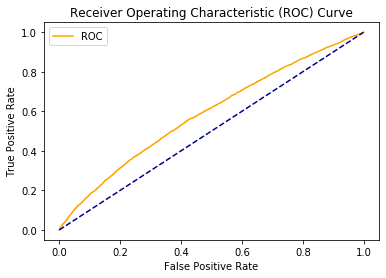

0.5880377070669223

In [13]:
y_probs = lr.predict_proba(X_test) # we have to get the probability values to plot roc curve
y_probs = y_probs[:, 1] # keep probabilities for the positive outcome only
fpr, tpr, _ = roc_curve(y_test, y_probs)
# roc_auc = auc(fpr, tpr)
plot_roc_curve(fpr, tpr)
lr_auc = roc_auc_score(y_test, y_probs)
lr_auc

In [14]:
kfold = KFold(7, True, 1)

In [15]:
for train_index, test_index in kfold.split(X):
    train_X, valid_X = X[train_index], X[test_index]
    train_y, valid_y = y[train_index], y[test_index]
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [     0      2      3 ... 101763 101764 101765] TEST: [     1      4      6 ... 101743 101758 101761]
TRAIN: [     0      1      2 ... 101762 101763 101764] TEST: [    10     20     28 ... 101756 101757 101765]
TRAIN: [     0      1      2 ... 101763 101764 101765] TEST: [    17     19     21 ... 101750 101753 101754]
TRAIN: [     0      1      2 ... 101763 101764 101765] TEST: [     3     13     14 ... 101735 101745 101760]
TRAIN: [     0      1      3 ... 101761 101764 101765] TEST: [     2     11     33 ... 101749 101762 101763]
TRAIN: [     1      2      3 ... 101763 101764 101765] TEST: [     0      5      7 ... 101751 101755 101759]
TRAIN: [     0      1      2 ... 101762 101763 101765] TEST: [     9     15     18 ... 101740 101744 101764]
